In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':16})

In [2]:
import datetime
import os
import numpy as np
import math

import waveform
import sample
import model_utils
import dataset

2022-07-17 16:00:20.017880: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-17 16:00:20.017935: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
import wispy.callbacks

In [4]:
# from model_utils import PoisonPillCallback

In [5]:
import pandas as pd

In [6]:
import tensorflow as tf

In [7]:
import pycbc.pnutils

In [8]:
import lalsimulation as lalsim

In [9]:
import sklearn.preprocessing

In [10]:
plt.rcParams.update({'font.size':16})

# generate waveform data

In [11]:
def gen_waveform_set(approximant, train_test_val, n_samples, nproc=1, mass_ratio_low=1, mass_ratio_high=8, return_data='hp_hc'):
    assert train_test_val in ['train', 'val']
    
    # approximant="IMRPhenomXHM"
    # approximant="IMRPhenomXPHM"
    # approximant="SEOBNRv4PHM"
    # approximant="IMRPhenomXAS"
    # approximant="SEOBNRv4_opt"
    # approximant="SEOBNRv4P"
    # approximant="SEOBNRv4P"
    # approximant="IMRPhenomXP"
    # approximant="IMRPhenomD"
    # approximant="IMRPhenomHM"

    # uniform spacing throughout
    t1 = -2000
    # t1 = -500
    # t1 = -200
    # t1 = -50
    
    # t1 = -50
    t2 = 70
    # t1 = -10
    # t2 = 20
    dt = 0.25
    new_times_M = np.arange(t1, t2, dt)

    t_idxs = np.arange(len(new_times_M))
    # t_training_idxs = None
    # t_validation_idxs = None
    if train_test_val == "train":
        t_idxs_sample = t_idxs[::2]
    elif train_test_val == "val":
        # t_idxs_sample = t_idxs[1::2]
        t_idxs_sample = t_idxs[::2]

    total_mass=100
    distance_mpc=1
    delta_t=1/4096
    f_lower=10
    
    mass_ratios = np.zeros(n_samples) + 4
    spin1xs = np.zeros(n_samples)
    spin1ys = np.zeros(n_samples)
    spin1zs = np.zeros(n_samples)
    spin2xs = np.zeros(n_samples)
    spin2ys = np.zeros(n_samples)
    spin2zs = np.zeros(n_samples)
    coa_phases = np.zeros(n_samples)
    # inclinations = np.random.uniform(0, np.pi, n_samples)
    inclinations = np.linspace(0, np.pi, n_samples)
    

    starttime = datetime.datetime.now()

    times, thetas, hps, hcs = waveform.generate_waveforms_mp(
        new_times_M,
        mass_ratios,
        spin1xs,
        spin1ys,
        spin1zs,
        spin2xs,
        spin2ys,
        spin2zs,
        coa_phases,
        inclinations,
        time_idxs=t_idxs_sample,
        total_mass=total_mass,
        approximant=approximant,
        distance_mpc=distance_mpc,
        delta_t=delta_t,
        f_lower=f_lower,
        nproc=nproc,
        return_data=return_data,
    )

    endtime = datetime.datetime.now()
    duration = endtime - starttime
    print(f"The time cost: {duration}")
    

    # return times[t_index][:,np.newaxis], thetas, hps[:,t_index][:,np.newaxis], hcs[:,t_index][:,np.newaxis]
    return times, thetas, hps, hcs

In [12]:
parameter_names = ['mass_ratio', 'spin1x', 'spin1y', 'spin1z', 'spin2x', 'spin2y', 'spin2z', 'coa_phase', 'inclination']

In [13]:

n_samples=20

# return_data='amp_phi'
return_data='hp_hc'

# t_index = 100

In [14]:
approxs=[
    # 'IMRPhenomD',
    # 'IMRPhenomXAS',
#     'SEOBNRv4_opt',
    'SEOBNRv4HM',
#     'IMRPhenomXP',
#     'IMRPhenomXPHM',
#     'IMRPhenomPv3', 
#     'SEOBNRv3_opt', 
#     'SEOBNRv4P',
#     'SEOBNRv4PHM',
#     'SEOBNRv4HM',
]
wfs={}
for approx in approxs:
    print(approx)
    wfs[approx]={}
    wfs[approx]['times'], wfs[approx]['thetas'], wfs[approx]['hps'], wfs[approx]['hcs'] = gen_waveform_set(approximant=approx, train_test_val='train', n_samples=n_samples, nproc=4, return_data=return_data)

SEOBNRv4HM
The time cost: 0:00:13.437389


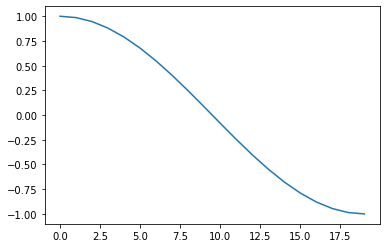

In [15]:
plt.plot(np.cos(wfs[approx]['thetas'][:,8]))

In [16]:
wfs[approx]['thetas'][:,8]

array([0.        , 0.16534698, 0.33069396, 0.49604095, 0.66138793,
       0.82673491, 0.99208189, 1.15742887, 1.32277585, 1.48812284,
       1.65346982, 1.8188168 , 1.98416378, 2.14951076, 2.31485774,
       2.48020473, 2.64555171, 2.81089869, 2.97624567, 3.14159265])

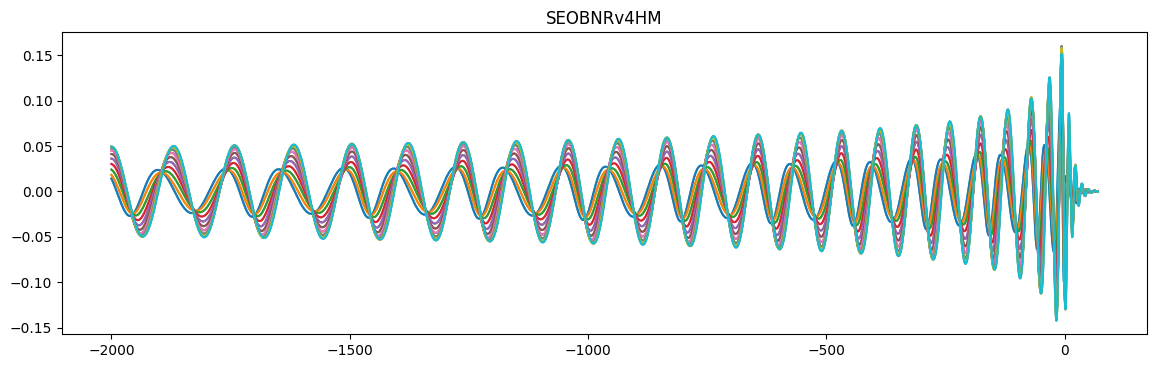

In [17]:
for approx in approxs:
    plt.figure(figsize=(14, 4), dpi=100)
    for i, hp in enumerate(wfs[approx]['hps']):
        plt.plot(wfs[approx]['times'], hp)
    plt.title(approx)

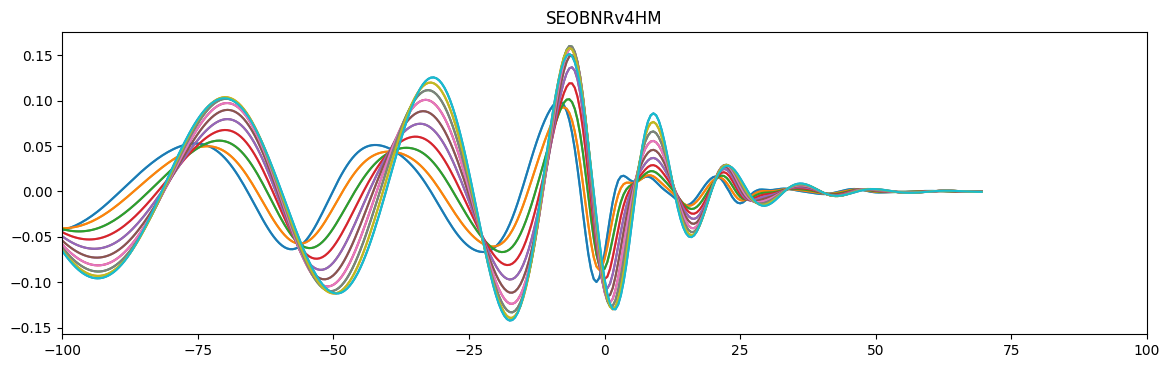

In [18]:
for approx in approxs:
    plt.figure(figsize=(14, 4), dpi=100)
    for i, hp in enumerate(wfs[approx]['hps']):
        plt.plot(wfs[approx]['times'], hp)
    plt.title(approx)
    plt.xlim(-100, 100)

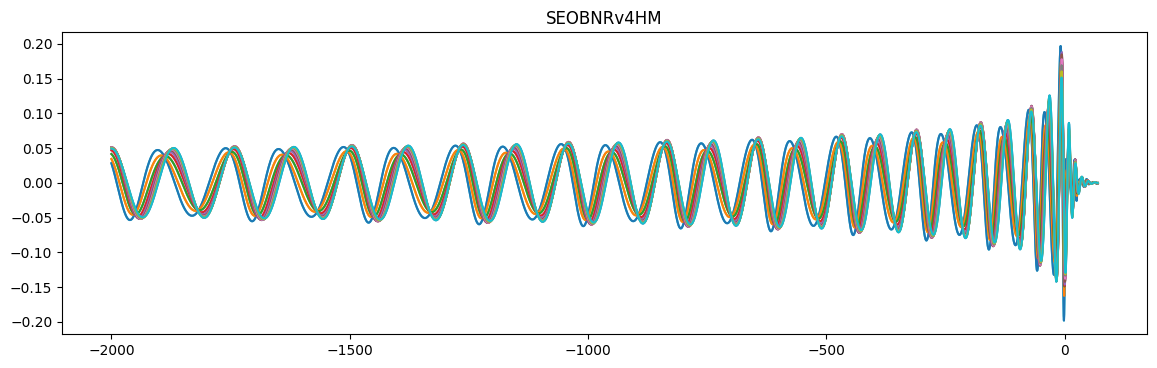

In [29]:
for approx in approxs:
    plt.figure(figsize=(14, 4), dpi=100)
    for i, hp in enumerate(wfs[approx]['hps']):
        fac = waveform.hp_inc_prefactor(wfs[approx]['thetas'][i,8])
        eta = waveform.eta_from_q(wfs[approx]['thetas'][i,0])
        plt.plot(wfs[approx]['times'], hp/fac)
    plt.title(approx)

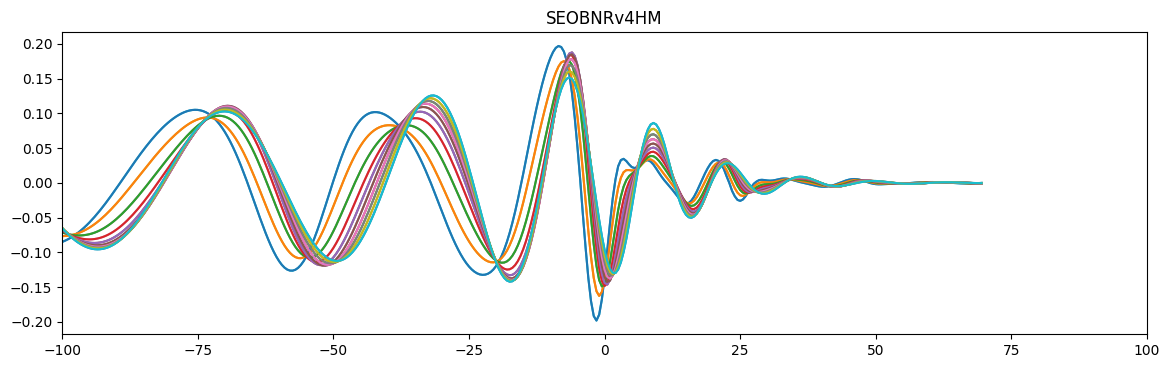

In [30]:
for approx in approxs:
    plt.figure(figsize=(14, 4), dpi=100)
    for i, hp in enumerate(wfs[approx]['hps']):
        fac = waveform.hp_inc_prefactor(wfs[approx]['thetas'][i,8])
        eta = waveform.eta_from_q(wfs[approx]['thetas'][i,0])
        plt.plot(wfs[approx]['times'], hp/fac)
    plt.title(approx)
    plt.xlim(-100, 100)

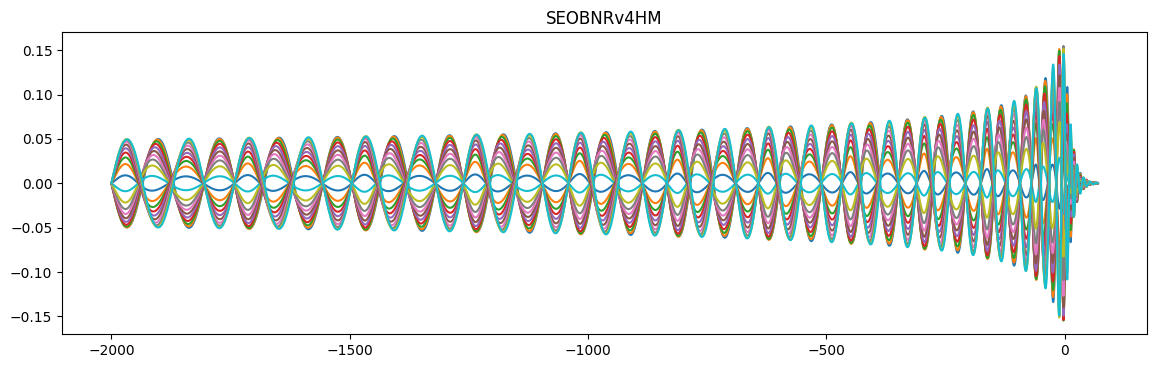

In [21]:
for approx in approxs:
    plt.figure(figsize=(14, 4), dpi=100)
    for hc in wfs[approx]['hcs']:
        plt.plot(wfs[approx]['times'], hc)
    plt.title(approx)

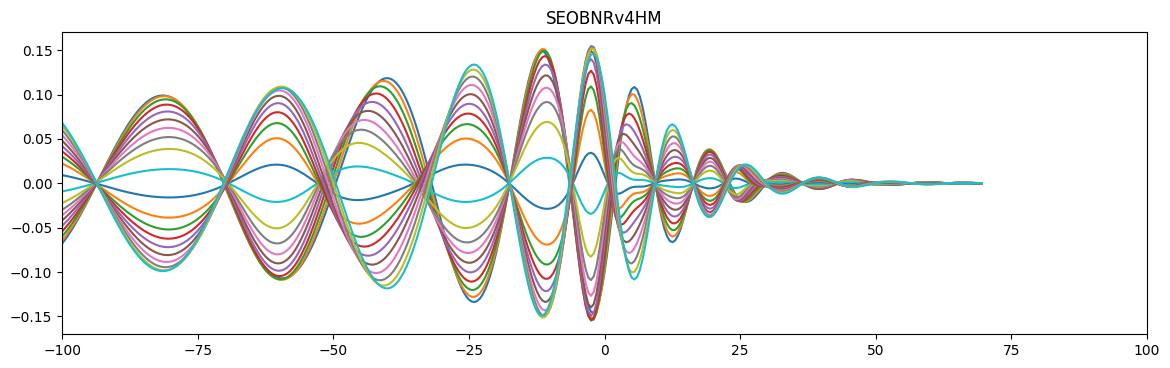

In [22]:
for approx in approxs:
    plt.figure(figsize=(14, 4), dpi=100)
    for hc in wfs[approx]['hcs']:
        plt.plot(wfs[approx]['times'], hc)
    plt.title(approx)
    plt.xlim(-100, 100)

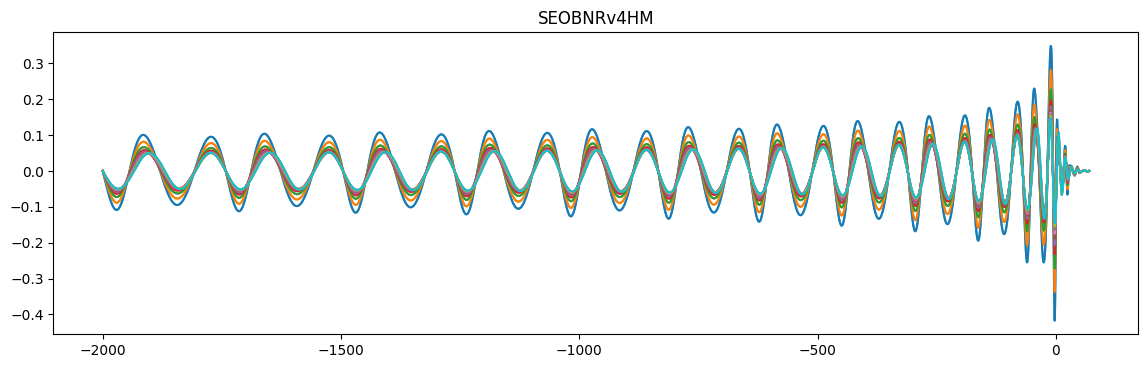

In [28]:
for approx in approxs:
    plt.figure(figsize=(14, 4), dpi=100)
    for i, hc in enumerate(wfs[approx]['hcs']):
        fac = waveform.hc_inc_prefactor(wfs[approx]['thetas'][i,8])
        eta = waveform.eta_from_q(wfs[approx]['thetas'][i,0])
        plt.plot(wfs[approx]['times'], hc/fac)
    plt.title(approx)

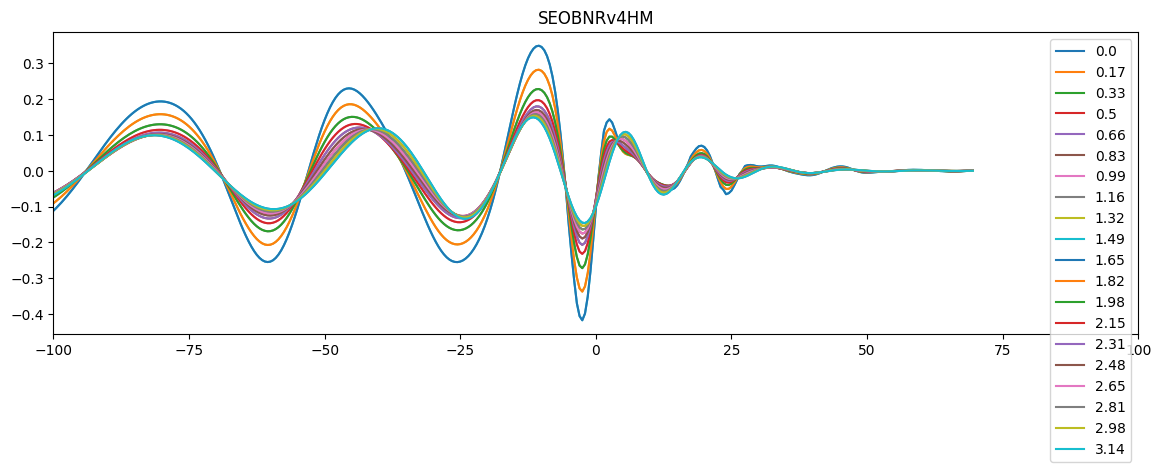

In [25]:
for approx in approxs:
    plt.figure(figsize=(14, 4), dpi=100)
    for i, hc in enumerate(wfs[approx]['hcs']):
        inc = wfs[approx]['thetas'][i,8]
        fac = waveform.hc_inc_prefactor(inc)
        eta = waveform.eta_from_q(wfs[approx]['thetas'][i,0])
        plt.plot(wfs[approx]['times'], hc/fac, label=np.around(inc,2))
    plt.title(approx)
    plt.xlim(-100, 100)
    plt.legend()